# Data Analysis on SLIDE Transactions Data in 2020

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

In [25]:
remittance = pd.read_csv('remittance.csv', index_col= 0,parse_dates=True)

In [26]:
remittance

,Country,No_of_Trx,Total_Amt_Recd,Tot_Comm_Rcvd S$,Tot_Remit_Value S$,Commitment_currency,Commitment Value
Date,,,,,,,
2020-01-01,ID,99,32840.89,482.5,32358.39,ID-IDR,332663742
2020-02-01,ID,145,45832.75,706.0,45131.75,ID-IDR,463687444
2020-03-01,ID,125,43231.98,608.0,42628.98,ID-IDR,437217542
2020-04-01,ID,104,35321.31,505.0,34821.31,ID-IDR,357017106
2020-05-01,ID,190,54593.28,931.5,53666.78,ID-IDR,551066866
...,...,...,...,...,...,...,...
2020-12-24,ID,230,73107.51,1133.0,71974.51,ID-IDR,762341679
2020-12-25,ID,239,62446.72,1176.5,61270.22,ID-IDR,649278458
2020-12-26,ID,248,69934.63,1227.0,68707.63,ID-IDR,728078160


In [58]:
remittance['day'] = remittance.index
remittance['day'] = remittance['day'].apply(lambda x : x.weekday())
remittance

,Country,No_of_Trx,Total_Amt_Recd,Tot_Comm_Rcvd S$,Tot_Remit_Value S$,Commitment_currency,Commitment Value,day
Date,,,,,,,,
2020-01-01,ID,99,32840.89,482.5,32358.39,ID-IDR,332663742,2
2020-02-01,ID,145,45832.75,706.0,45131.75,ID-IDR,463687444,5
2020-03-01,ID,125,43231.98,608.0,42628.98,ID-IDR,437217542,6
2020-04-01,ID,104,35321.31,505.0,34821.31,ID-IDR,357017106,2
2020-05-01,ID,190,54593.28,931.5,53666.78,ID-IDR,551066866,4
...,...,...,...,...,...,...,...,...
2020-12-24,ID,230,73107.51,1133.0,71974.51,ID-IDR,762341679,3
2020-12-25,ID,239,62446.72,1176.5,61270.22,ID-IDR,649278458,4
2020-12-26,ID,248,69934.63,1227.0,68707.63,ID-IDR,728078160,5


In [65]:
trx = remittance[['No_of_Trx', 'day']]
amt = remittance[['Total_Amt_Recd', 'day']]

# Visualising Number of Transactions over 2020

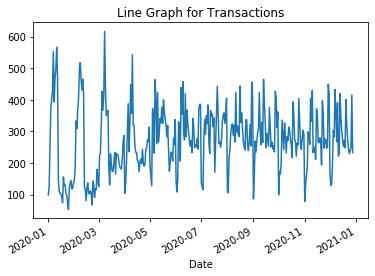

In [67]:
plt.title('Line Graph for Transactions')
trx['No_of_Trx'].plot()

# Visualising Amount (dollars) of Transactions over 2020

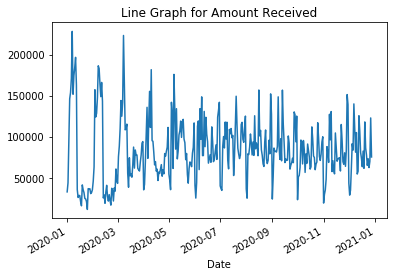

In [68]:
plt.title('Line Graph for Amount Received')
amt['Total_Amt_Recd'].plot()

# Histogram for Transactions in 2020
- It can be observed that there are between 220 to 280 transactions made in 100 days in 2020

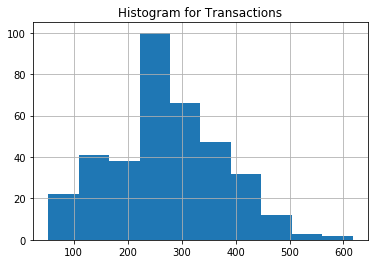

In [69]:
plt.title('Histogram for Transactions')
trx['No_of_Trx'].hist()

# Histogram for Amount (dollars) of Transactions in 2020
- It can be observed that on slightly more than 70 days in 2020, the amount of transactions fell between 60k to 80k.

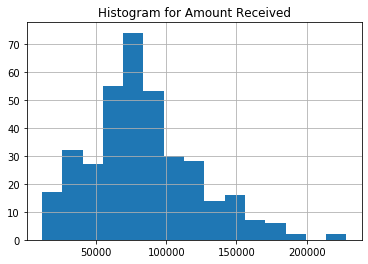

In [70]:
plt.title('Histogram for Amount Received')
amt['Total_Amt_Recd'].hist(bins=15)

In [76]:
grouped_trx = trx.groupby(['day']).sum()
grouped_amt = amt.groupby(['day']).sum()

# Peak Periods
- Thursday, Saturday and Sunday
- Friday saw the lowest number of transactions

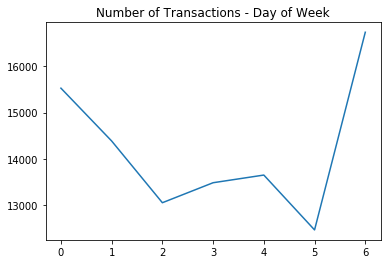

In [81]:
plt.title('Number of Transactions - Day of Week')
plt.plot(grouped_trx)
plt.show()

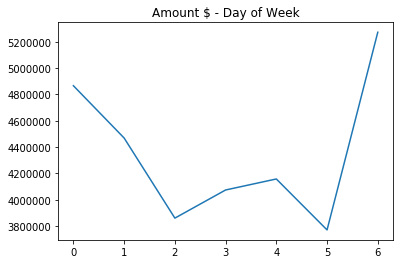

In [84]:
plt.title('Amount $ - Day of Week')
plt.plot(grouped_amt)
plt.show()

# Time Series Forecasting for Number of Transactions

In [88]:
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [89]:
trx['ds'] = trx.index
trx['y'] = trx['No_of_Trx']
model = Prophet(changepoint_prior_scale=0.01).fit(trx)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# The following shows what Prophet has learnt from the input data -- as it attempts to fit a line that exhibits the trends of the transactions values.

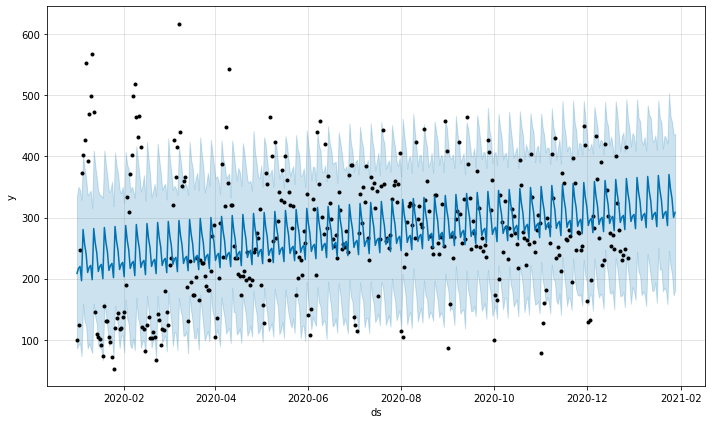

In [90]:
future = model.make_future_dataframe(periods=31)
forecast = model.predict(future)
y = model.plot(forecast)
plt.show()
y.savefig('forecast.png')

# From this model, Prophet picked up that the trend of the data is INCREASING.

In [91]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,230.662244,85.503617,334.198830,230.662244,230.662244,-22.194645,-22.194645,-22.194645,-22.194645,-22.194645,-22.194645,0.0,0.0,0.0,208.467599
1,2020-01-02,230.896901,91.719829,350.106964,230.896901,230.896901,-14.046542,-14.046542,-14.046542,-14.046542,-14.046542,-14.046542,0.0,0.0,0.0,216.850358
2,2020-01-03,231.131557,94.471719,344.783057,231.131557,231.131557,-11.124311,-11.124311,-11.124311,-11.124311,-11.124311,-11.124311,0.0,0.0,0.0,220.007246
3,2020-01-04,231.366214,73.153519,329.043381,231.366214,231.366214,-34.697748,-34.697748,-34.697748,-34.697748,-34.697748,-34.697748,0.0,0.0,0.0,196.668466
4,2020-01-05,231.600871,158.706846,400.676680,231.600871,231.600871,48.748600,48.748600,48.748600,48.748600,48.748600,48.748600,0.0,0.0,0.0,280.349471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,2021-01-24,321.589944,245.498494,503.104908,321.588359,321.591547,48.748600,48.748600,48.748600,48.748600,48.748600,48.748600,0.0,0.0,0.0,370.338545
390,2021-01-25,321.823360,220.679709,465.735906,321.821669,321.825079,24.724272,24.724272,24.724272,24.724272,24.724272,24.724272,0.0,0.0,0.0,346.547632
391,2021-01-26,322.056775,207.760527,456.053472,322.054988,322.058581,8.590375,8.590375,8.590375,8.590375,8.590375,8.590375,0.0,0.0,0.0,330.647150
392,2021-01-27,322.290191,172.592055,435.911103,322.288295,322.292105,-22.194645,-22.194645,-22.194645,-22.194645,-22.194645,-22.194645,0.0,0.0,0.0,300.095546


# Below graph shows the rough estimation/predictions for SLIDE transactions

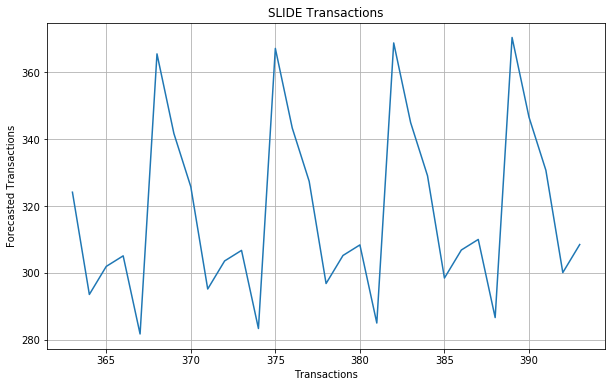

In [97]:
# Plot Transactions Data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Transactions')
plt.ylabel('Forecasted Transactions')
plt.plot(forecast['yhat'][-31:])
plt.title('SLIDE Transactions')
plt.show()

# From the above exploratory data analysis and time series forecasting using Prophet modelling, the following insights could be useful:
- It can be observed that there are between 220 to 280 transactions made in 100 days in 2020
- It can be observed that on slightly more than 70 days in 2020, the amount of transactions fell between 60k to 80k.
- Number of Transactions peak on Sundays, Saturdays then Thursdays weekly.
- Fridays saw the lowest number of transactions, followed by Tuesdays.
- According to the trend exhibited by the transaction values from 2020 January to 2020 December, the forecasted trend over the next Month in 2021 January is forecasted to be INCREASING.